In [8]:
# Generate a balanced dataset, where each class has the same number of datapoints as the smallest class.

In [1]:
import sys  
sys.path.insert(0, 'C:\\Users\\espebh\\Documents\\Thesis\\code_ver2')
import os
import numpy as np
import torch
import torchvision
import json
from PIL import Image
import random
import pickle
import matplotlib.pyplot as plt
from helpers import m
from helpers.dataset_evaluation import print_class_distribution, size_smallest_class
import cv2


In [11]:
train_path = 'C:\\Users\\espebh\\Documents\\Thesis\\data\\semiautomatically generated data\\labled data\\tank 7 data\\all_data'
#balanced_data_path = 'C:\\Users\\espebh\\Documents\\Thesis\\data\\semiautomatically generated data\\labled data\\tank 7 data\\balanced_data'

In [12]:
class salmonToraxDataset(torch.utils.data.Dataset):
    def __init__(self, path):
        self.transforms = torchvision.transforms.ToTensor()
        self.imgs = list(sorted(os.listdir(os.path.join(path, 'images'))))
        self.targets = list(sorted(os.listdir(os.path.join(path, 'labels'))))
        self.path = path
        
    def __getitem__(self, idx):
        
        with open(os.path.join(self.path, 'labels', self.targets[idx])) as f:
            label = json.load(f)
        img = Image.open(os.path.join(self.path, 'images', self.imgs[idx]))

        img_tensor = torchvision.transforms.functional.pil_to_tensor(img)
        img_tensor = torch.div(img_tensor, 255)
        img_tensor = img_tensor.to(m.DEVICE)
        return img_tensor, label

    def __len__(self):
        return len(self.imgs)

In [13]:
train_dataset = salmonToraxDataset(train_path)
data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
images, targets = next(iter(data_loader_train))
print_class_distribution(data_loader_train)

Class:  0  has  0 datapoints
Class:  1  has  819 datapoints
Class:  2  has  673 datapoints
Class:  3  has  748 datapoints
Class:  4  has  570 datapoints
Class:  5  has  648 datapoints
Class:  6  has  1047 datapoints
Class:  7  has  623 datapoints
Class:  8  has  1006 datapoints
Class:  9  has  690 datapoints
Class:  10  has  1243 datapoints
Class:  11  has  573 datapoints
Class:  12  has  584 datapoints
Class:  13  has  1087 datapoints
Class:  14  has  953 datapoints
Class:  15  has  0 datapoints
Class:  16  has  0 datapoints


In [154]:
def build_balanced_dataset(data_loader, size, path):
    num=0
    store_dict = {x:0 for x in range(0, m.NUM_CLASSES_T9)}
    for images, labels in data_loader:
        for i in range(len(images)):
            label = int(labels[i].detach().cpu().numpy())
            image = images[i].detach().cpu().numpy().transpose(1,2,0)
            if store_dict[label] < size:
                num = num + 1
                store_dict[label] = store_dict[label] + 1
                cv2.imwrite(os.path.join(path, 'images', str(num) + '.jpeg'), np.multiply(image, 255).astype(np.uint8)) # Save image
                with open(os.path.join(path, 'labels', str(num) + '.json'), 'w') as f: # Save label
                    json.dump(label, f)

In [155]:
#min_cls = size_smallest_class(data_loader_train)
min_cls = 570
build_balanced_dataset(data_loader_train, min_cls, balanced_data_path)

In [156]:
balanced_dataset = salmonToraxDataset(balanced_data_path)
data_loader_balanced = torch.utils.data.DataLoader(balanced_dataset, batch_size=32, shuffle=True)
print_class_distribution(data_loader_balanced)
        

Class:  0  has  0 datapoints
Class:  1  has  570 datapoints
Class:  2  has  570 datapoints
Class:  3  has  570 datapoints
Class:  4  has  570 datapoints
Class:  5  has  570 datapoints
Class:  6  has  570 datapoints
Class:  7  has  570 datapoints
Class:  8  has  570 datapoints
Class:  9  has  570 datapoints
Class:  10  has  570 datapoints
Class:  11  has  570 datapoints
Class:  12  has  570 datapoints
Class:  13  has  570 datapoints
Class:  14  has  570 datapoints
Class:  15  has  0 datapoints
Class:  16  has  0 datapoints


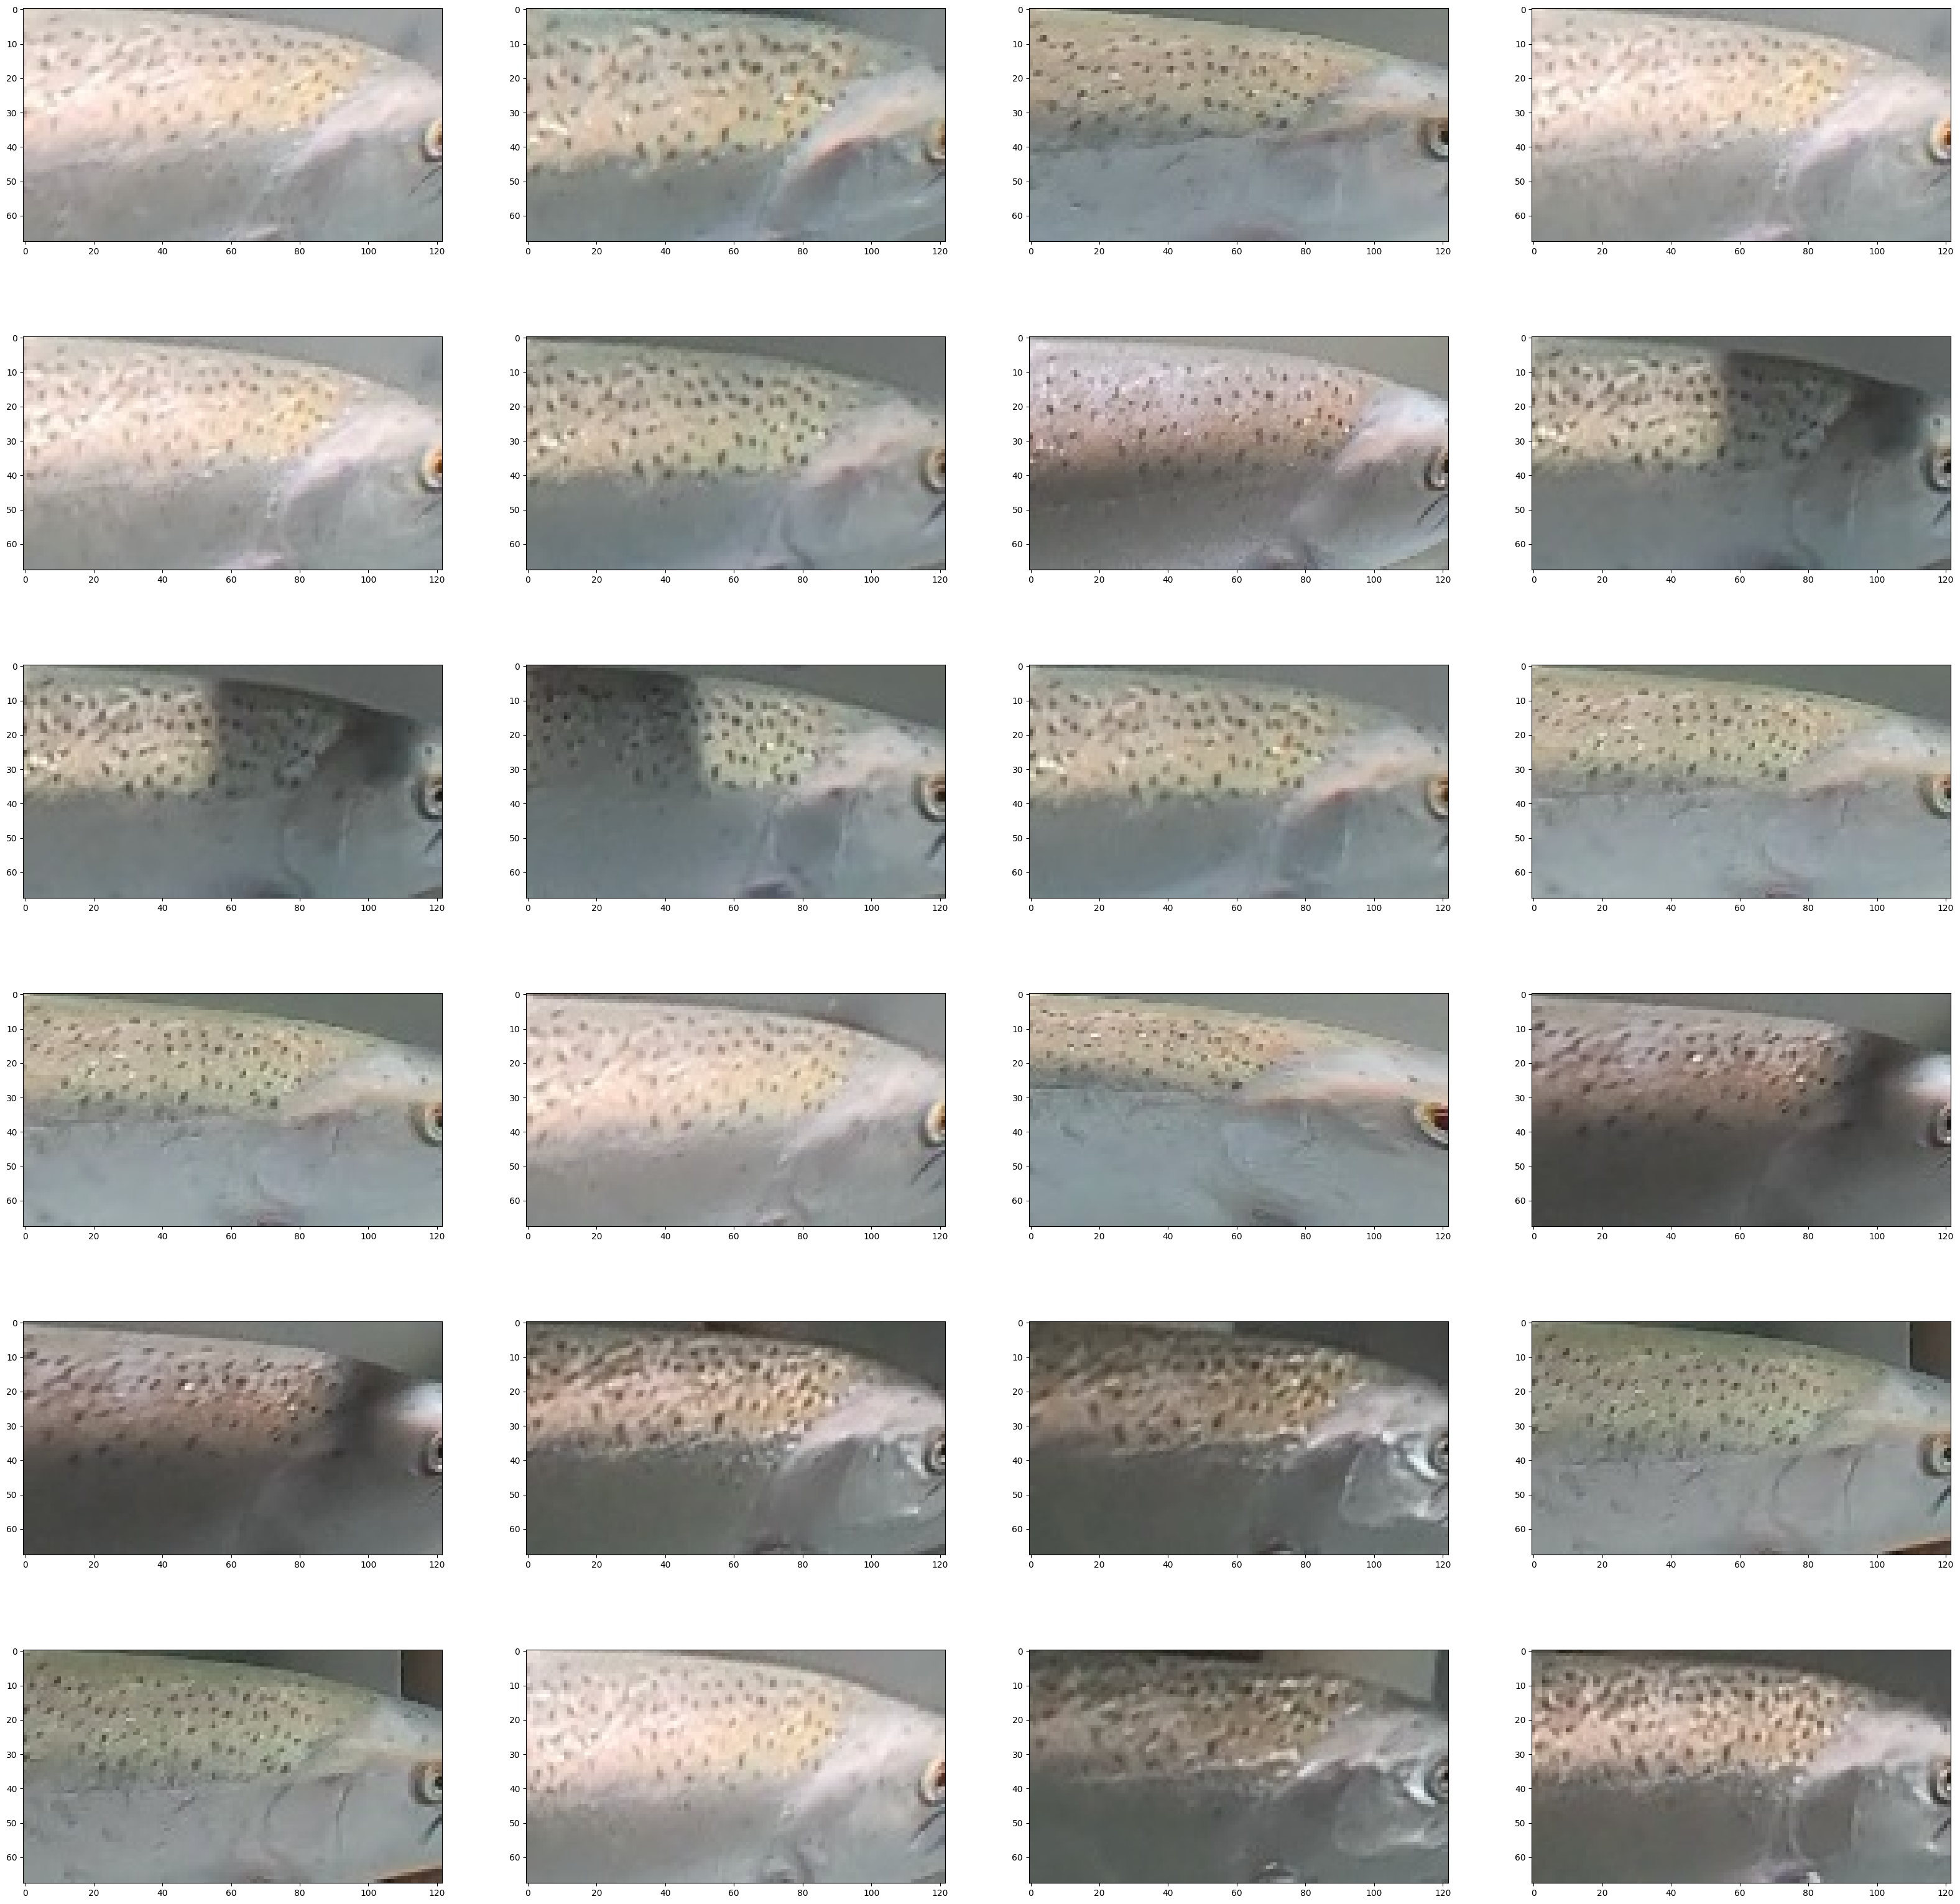

In [175]:
# Plot a large number of data from one class
cls = 14
nr_imgs = 28
img_arr = []
while len(img_arr) < nr_imgs:
    images, targets = next(iter(data_loader_balanced))
    if sum(targets.detach().numpy()==cls)>0:
        imgs = np.transpose(images[targets.detach().numpy()==cls], (0,2,3,1))
        imgs = imgs.detach().numpy()
        img_arr = img_arr + list(imgs)

fig, ax = plt.subplots(6, 4, figsize = (40,40))
for i in range(6):
    for j in range(4):
        ax[i][j].imshow(img_arr[j+i*3])


background
Aaron_sl
Baasha_sr
Caiphas_sl
Daniel_sr
Ebed-Melech_sl
Aaron_sr
Daniel_sl
Ebed-Melech_sr
Gehasi_sr
Caiphas_sr
Hosea_sl
Baasha_sl
front
occluded
Hosea_sr
Gehasi_sl


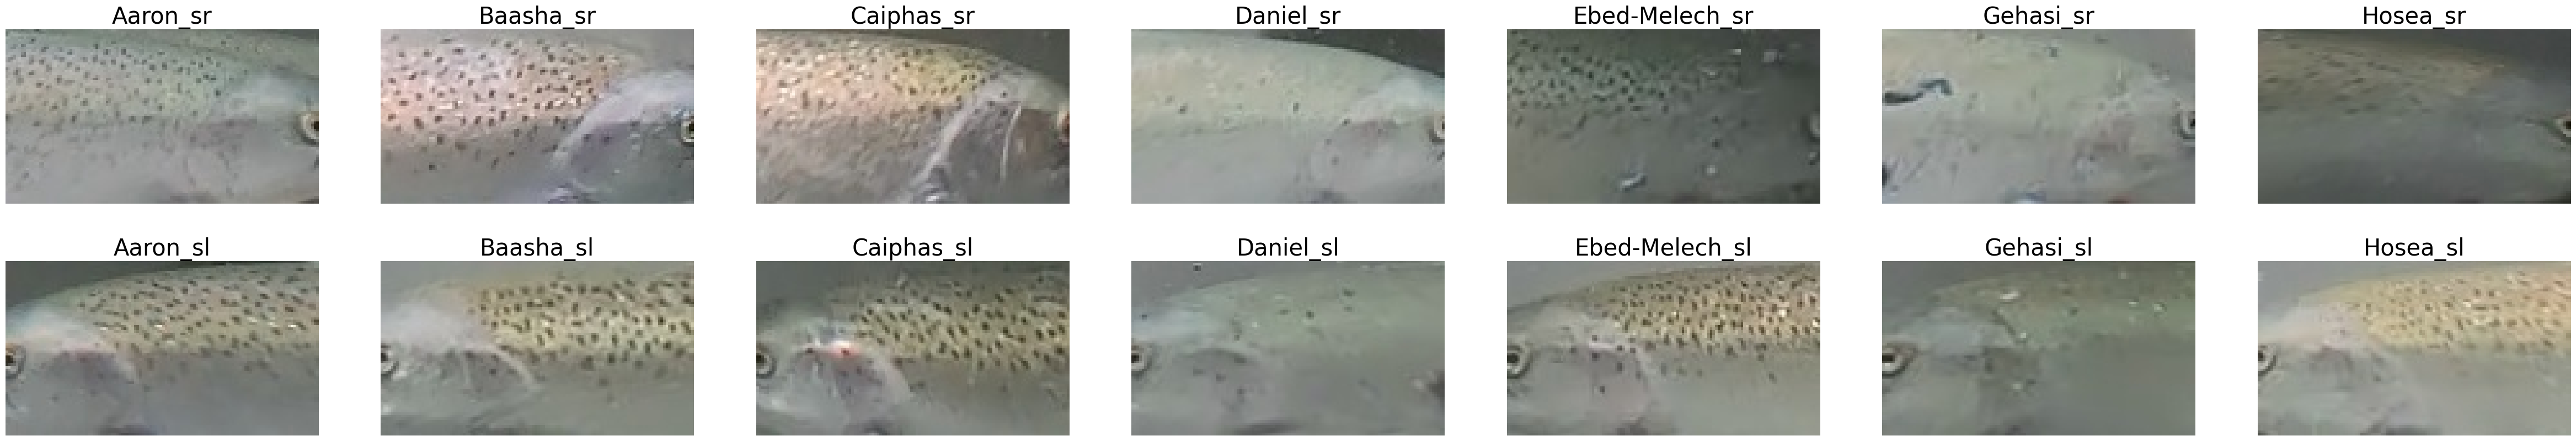

In [42]:
# Plot all classes

img_arr = []
cls = 1
l_img = 16
while cls <= l_img:
    if cls == 13:
        cls = 15
    images, targets = next(iter(data_loader_balanced))
    if sum(targets.detach().numpy()==cls)>0:
        imgs = np.transpose(images[targets.detach().numpy()==cls], (0,2,3,1))
        imgs = imgs.detach().numpy()
        img_arr.append(list(imgs[0,:,:,:]))
        #img_arr = img_arr + list(imgs[0,:,:,:])
        cls = cls + 1


fig, ax = plt.subplots(2, 7, figsize = (60,10))
for fish_idx in m.CLASSES_MAP_T9.keys():
    if m.CLASSES_MAP_T9[fish_idx].endswith('sr'):
        col = 0
    elif m.CLASSES_MAP_T9[fish_idx].endswith('sl'):
        col = 1
    else:
        col = 2
    
    if m.CLASSES_MAP_T9[fish_idx].startswith('A'):
        row = 0
    if m.CLASSES_MAP_T9[fish_idx].startswith('B'):
        row = 1
    if m.CLASSES_MAP_T9[fish_idx].startswith('C'):
        row = 2
    if m.CLASSES_MAP_T9[fish_idx].startswith('D'):
        row = 3
    if m.CLASSES_MAP_T9[fish_idx].startswith('E'):
        row = 4
    if m.CLASSES_MAP_T9[fish_idx].startswith('G'):
        row = 5
    if m.CLASSES_MAP_T9[fish_idx].startswith('H'):
        row = 6
    print(m.CLASSES_MAP_T9[fish_idx])

    if col < 2:
        if fish_idx <= 13:
            ax[col][row].imshow(img_arr[fish_idx-1])
            ax[col][row].set_title(m.CLASSES_MAP_T9[fish_idx], fontsize=30)
        if fish_idx >= 15:
            ax[col][row].imshow(img_arr[fish_idx-3])
            ax[col][row].set_title(m.CLASSES_MAP_T9[fish_idx], fontsize=30)
        ax[col][row].axis('off')


# ax[1][0].imshow(img_arr[5])
# ax[1][0].set_title(m.CLASSES_T9[6], fontsize=30)
# ax[0][0].axis('off')
# ax[0][1].imshow(img_arr[11])
# ax[1][1].set_title(m.CLASSES_T9[12], fontsize=30)
# ax[0][0].axis('off')
# ax[1][1].imshow(img_arr[1])
# ax[0][1].set_title(m.CLASSES_T9[2], fontsize=30)
# ax[0][0].axis('off')
# ax[0][2].imshow(img_arr[2])
# ax[1][2].set_title(m.CLASSES_T9[3], fontsize=30)
# ax[0][0].axis('off')
# ax[1][2].imshow(img_arr[9])
# ax[0][2].set_title(m.CLASSES_T9[10], fontsize=30)
# ax[0][0].axis('off')
# ax[0][3].imshow(img_arr[6])
# ax[1][3].set_title(m.CLASSES_T9[7], fontsize=30)
# ax[0][0].axis('off')
# ax[1][3].imshow(img_arr[3])
# ax[0][3].set_title(m.CLASSES_T9[4], fontsize=30)
# ax[0][0].axis('off')
# ax[0][4].imshow(img_arr[4])
# ax[1][4].set_title(m.CLASSES_T9[5], fontsize=30)
# ax[0][0].axis('off')
# ax[1][4].imshow(img_arr[7])
# ax[0][4].set_title(m.CLASSES_T9[8], fontsize=30)
# ax[0][0].axis('off')
# ax[0][5].imshow(img_arr[13])
# ax[1][5].set_title(m.CLASSES_T9[16], fontsize=30)
# ax[0][0].axis('off')
# ax[1][5].imshow(img_arr[8])
# ax[0][5].set_title(m.CLASSES_T9[9], fontsize=30)
# ax[0][0].axis('off')
# ax[0][6].imshow(img_arr[10])
# ax[1][6].set_title(m.CLASSES_T9[11], fontsize=30)
# ax[0][0].axis('off')
# ax[1][6].imshow(img_arr[12])
# ax[0][6].set_title(m.CLASSES_T9[15], fontsize=30)
# ax[0][0].axis('off')

